In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [19]:
df = pd.read_csv("StudentsPerformance.csv")
print(df.shape)
print()
df.head()

(1000, 8)



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []


In [21]:
df.info()
#. 1.¿Qué tipo de variables tiene el dataset? Detalle el tipo de variable de cada columna.
# Como se puede ver en la siguiente grafica los datos son cuantitativos ordinales por cada columna.                                                                                                     


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [22]:
df.describe()
#2.¿En qué asignatura en promedio los estudiantes obtuvieron un mejor puntaje?
#Los estudiantes tuvieron una mejor puntuación en la asignatura de matematicas.

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [23]:
df['percentage'] = round(((df['math score'] + df['reading score'] + df['writing score'])/300)*100, 2)
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33
5,female,group B,associate's degree,standard,none,71,83,78,77.33
6,female,group B,some college,standard,completed,88,95,92,91.67
7,male,group B,some college,free/reduced,none,40,43,39,40.67
8,male,group D,high school,free/reduced,completed,64,64,67,65.00
9,female,group B,high school,free/reduced,none,38,60,50,49.33


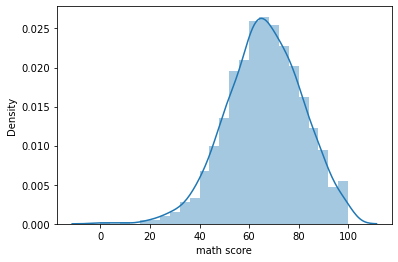

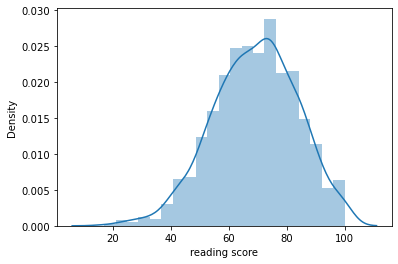

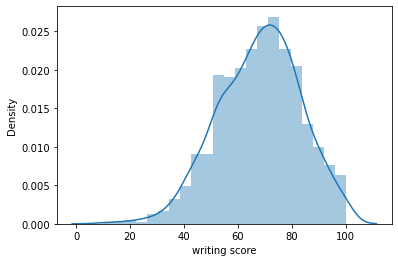

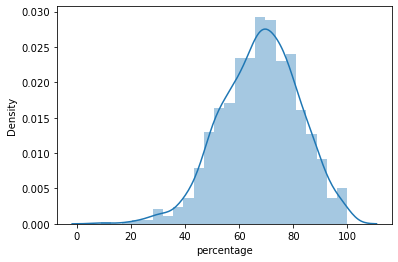

In [24]:
for c in df.columns:
    if (df[c].dtype != 'object'):
        ax = sns.distplot(df[c])
        plt.show()

In [25]:
df['result'] = df.apply(lambda x : 'F' if x['math score']<40 or x['reading score']<40 or x['writing score']<40 else 'P', axis = 1)
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,result
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,P
1,female,group C,some college,standard,completed,69,90,88,82.33,P
2,female,group B,master's degree,standard,none,90,95,93,92.67,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,P
4,male,group C,some college,standard,none,76,78,75,76.33,P
5,female,group B,associate's degree,standard,none,71,83,78,77.33,P
6,female,group B,some college,standard,completed,88,95,92,91.67,P
7,male,group B,some college,free/reduced,none,40,43,39,40.67,F
8,male,group D,high school,free/reduced,completed,64,64,67,65.00,P
9,female,group B,high school,free/reduced,none,38,60,50,49.33,F


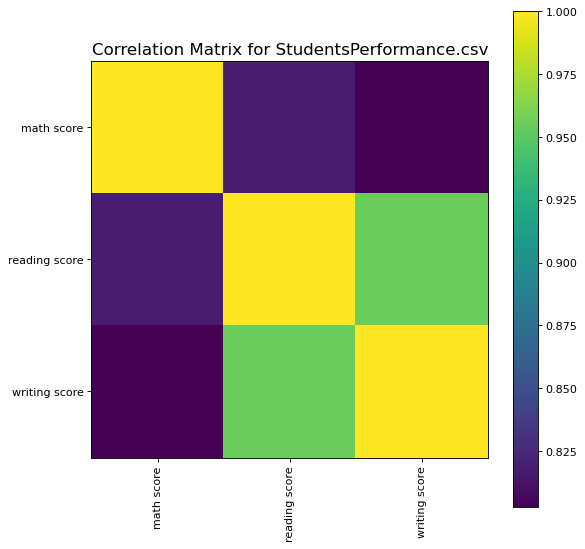

In [15]:
plotCorrelationMatrix(df1, 8)
#3¿Existe alguna correlación entre los puntajes obtenidos en las tres asignaturas?
#Si existe ya que se puede ver que los puntajes no desvarian mucho.

In [26]:
def grading(percentage, result):
    if (result == 'F'):
        return 'F'
    if (percentage >= 90):
        return 'A'
    if (percentage >= 80):
        return 'B'
    if (percentage >= 70):
        return 'C'
    if (percentage >= 55):
        return 'D'
    if (percentage >= 40):
        return 'E'
    
df['grade'] = df.apply(lambda x : grading(x['percentage'], x['result']), axis=1)
df.head()
#4. ¿Hay alguna diferencia observable en los puntajes de la asignatura de matemáticas entre hombres y mujeres? ¿Quiénes, hombres o mujeres, tienen la mediana más alta para esta misma asignatura?
#Si como se puede ver los hombres ontuvieron puntajes mas bajos que al de las mujeres,la mediana mas alta las tienen la mujeres.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,result,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,P,C
1,female,group C,some college,standard,completed,69,90,88,82.33,P,B
2,female,group B,master's degree,standard,none,90,95,93,92.67,P,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,P,E
4,male,group C,some college,standard,none,76,78,75,76.33,P,C


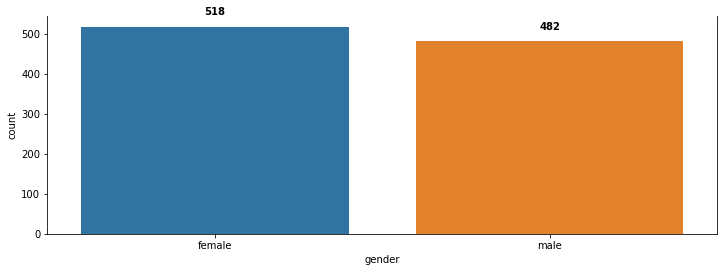

----------------------------------------------------------------------------------------------------


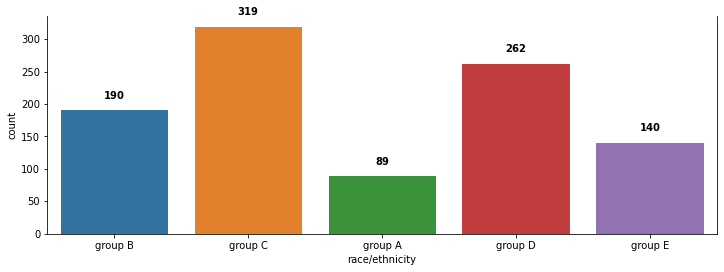

----------------------------------------------------------------------------------------------------


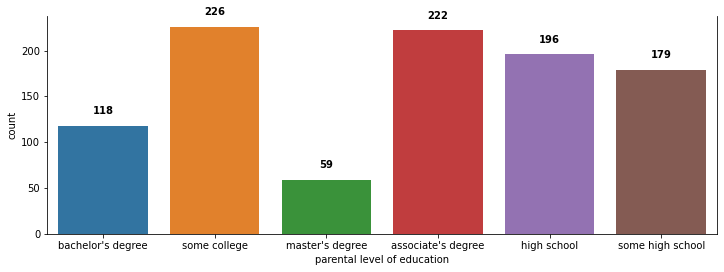

----------------------------------------------------------------------------------------------------


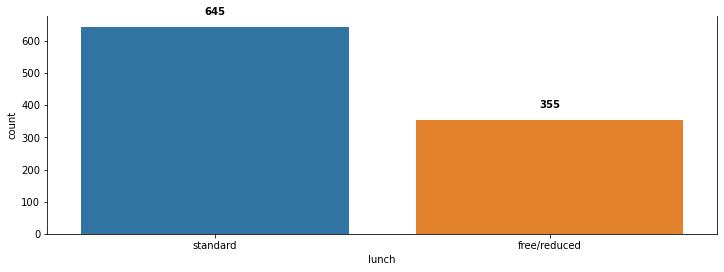

----------------------------------------------------------------------------------------------------


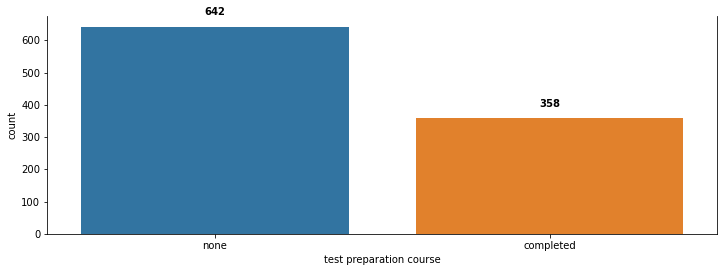

----------------------------------------------------------------------------------------------------


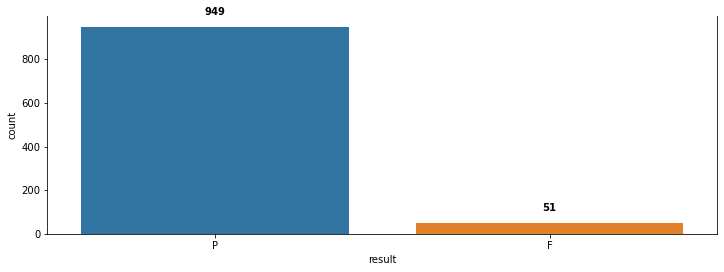

----------------------------------------------------------------------------------------------------


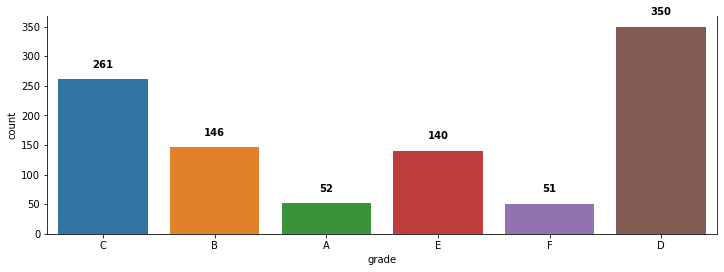

----------------------------------------------------------------------------------------------------


In [27]:
for c in df.columns:
    if (df[c].dtype == 'object'):
        plt.figure(figsize=(12,4))
        ax = sns.countplot(df[c])
        ax.spines['top'].set_visible(False)
        for p in ax.patches:
            ax.text(p.get_x()+p.get_width()/2, p.get_height(), str(p.get_height())+'\n', ha='center', weight='bold')
        plt.show()
        print('-'*100)


Graphs shows the conunt and percent of students out of total students who passed the examination.
****************************************************************************************************



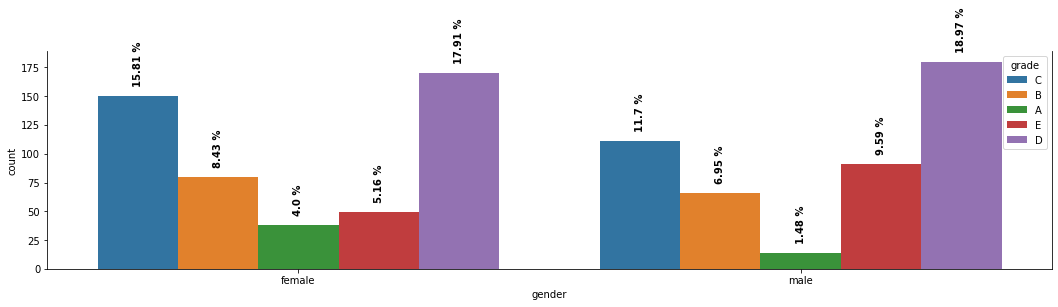

----------------------------------------------------------------------------------------------------


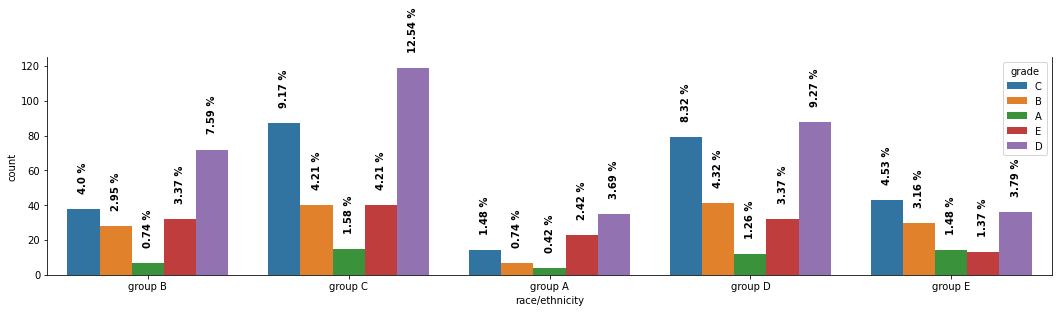

----------------------------------------------------------------------------------------------------


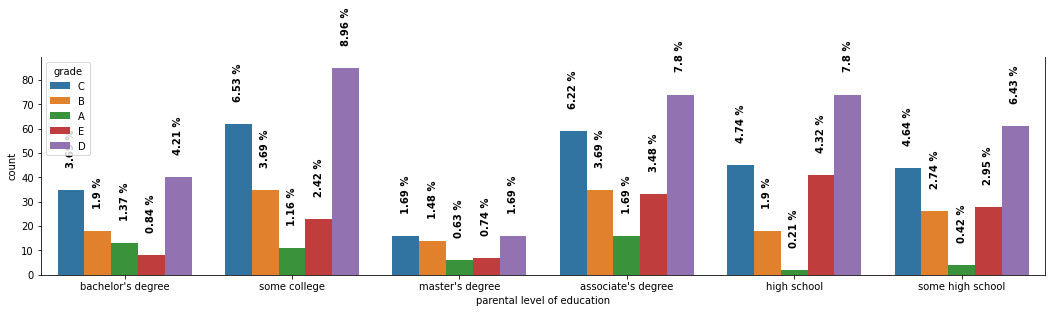

----------------------------------------------------------------------------------------------------


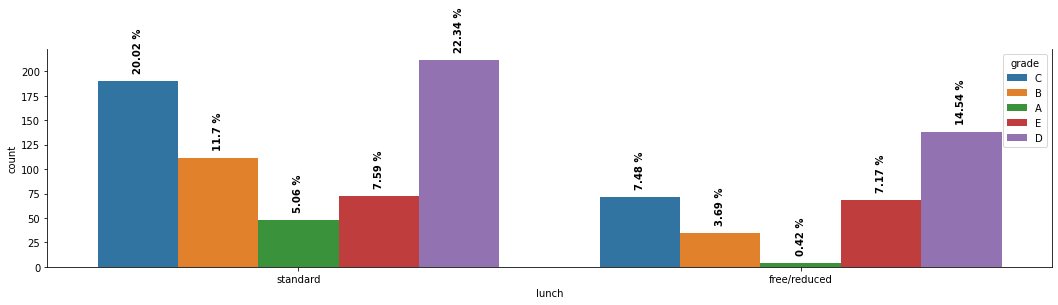

----------------------------------------------------------------------------------------------------


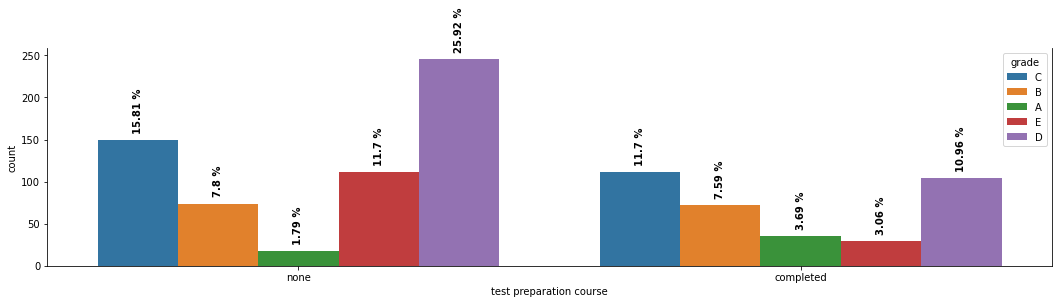

----------------------------------------------------------------------------------------------------


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

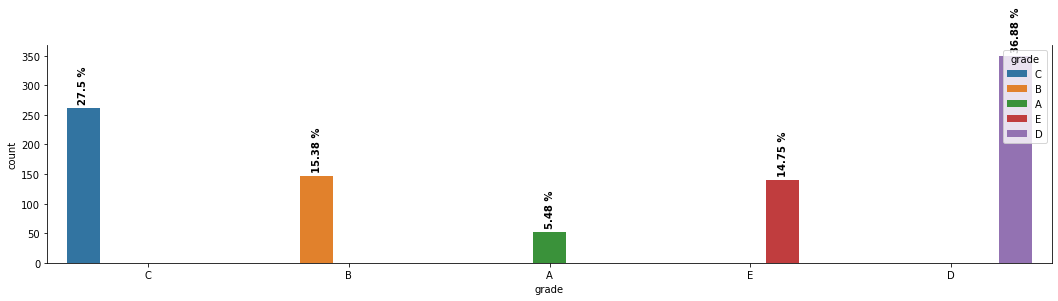

----------------------------------------------------------------------------------------------------


In [28]:
pp = df[df['result'] == 'P'].drop(['result'], axis=1)
print('Graphs shows the conunt and percent of students out of total students who passed the examination.')
print('*'*100)
print()
for c in pp.columns:
    if (pp[c].dtype == 'object'):
        plt.figure(figsize=(18,4))
        ax = sns.countplot(x=c, hue='grade', data=pp)
        ax.spines['top'].set_visible(False)
        for p in ax.patches:
            ax.text(p.get_x()+p.get_width()/2, p.get_height()+10, str(round(((p.get_height()/len(pp))*100), 2))+' %', ha='center', weight='bold', rotation=90)
        plt.show()
        print('-'*100)
#6¿Qué porcentaje de los estudiantes obtuvieron puntajes iguales o superiores a 90 en las tres asignaturas? ¿Qué porcentaje de los estudiantes obtuvieron puntajes iguales o superiores a 90 en las tres asignaturas y que adicionalmente estudiaron para los exámenes?
#Un 16.38% de los estudiantes obtuvieron un puntaje mayor a 90, ninguna materia estuvo igual en porcentajes, por ultimo usaron la preparación standard.

In [29]:
df['gender_num'] = df['gender'].apply(lambda x : 0 if x == 'female' else 1)
df['lunch_num'] = df['lunch'].apply(lambda x : 0 if x == 'free/reduced' else 1)
df['course_num'] = df['test preparation course'].apply(lambda x : 0 if x == 'none' else 1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,result,grade,gender_num,lunch_num,course_num
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,P,C,0,1,0
1,female,group C,some college,standard,completed,69,90,88,82.33,P,B,0,1,1
2,female,group B,master's degree,standard,none,90,95,93,92.67,P,A,0,1,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,P,E,1,0,0
4,male,group C,some college,standard,none,76,78,75,76.33,P,C,1,1,0


In [30]:
def edu(x) :
    if x == "master's degree" :
        return 0
    if x == "bachelor's degree" :
        return 1
    if x == "associate's degree" :
        return 2
    if x == 'some college' :
        return 3
    if x == 'high school' :
        return 4
    else :
        return 5

df['parent education_num'] = df['parental level of education'].apply(lambda x : edu(x))

df.head(10)
#5.¿Qué nivel de escolaridad tienen los padres de los estudiantes que obtuvieron un puntaje superior a 90 en la asignatura de escritura? Liste los niveles de escolaridad del más al menos frecuente.
# los niveles de escolaridad que obtuvieron son master's degreen y some college,

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,result,grade,gender_num,lunch_num,course_num,parent education_num
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,P,C,0,1,0,1
1,female,group C,some college,standard,completed,69,90,88,82.33,P,B,0,1,1,3
2,female,group B,master's degree,standard,none,90,95,93,92.67,P,A,0,1,0,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,P,E,1,0,0,2
4,male,group C,some college,standard,none,76,78,75,76.33,P,C,1,1,0,3
5,female,group B,associate's degree,standard,none,71,83,78,77.33,P,C,0,1,0,2
6,female,group B,some college,standard,completed,88,95,92,91.67,P,A,0,1,1,3
7,male,group B,some college,free/reduced,none,40,43,39,40.67,F,F,1,0,0,3
8,male,group D,high school,free/reduced,completed,64,64,67,65.00,P,D,1,0,1,4
9,female,group B,high school,free/reduced,none,38,60,50,49.33,F,F,0,0,0,4


In [8]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [9]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [10]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [11]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [14]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('StudentsPerformance.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'StudentsPerformance.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 8 columns
